In [1]:
import yfinance as yf
import numpy as np

In [2]:
data = yf.download("AAPL", start="2020-01-01", end="2021-12-31")

returns = data["Adj Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


In [4]:
def omega_ratio(returns, required_return=0.0):
    """Determines the Omega ratio of a strategy.

    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    required_return : float, optional
        Minimum acceptance return of the investor. Threshold over which to
        consider positive vs negative returns. It will be converted to a
        value appropriate for the period of the returns. E.g. An annual minimum
        acceptable return of 100 will translate to a minimum acceptable
        return of 0.018.

    Returns
    -------
    omega_ratio : float

    Note
    -----
    See <https://en.wikipedia.org/wiki/Omega_ratio> for more details.
    """

    return_threshold = (1 + required_return) ** (1 / 252) - 1

    returns_less_thresh = returns - return_threshold

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan

<AxesSubplot:>

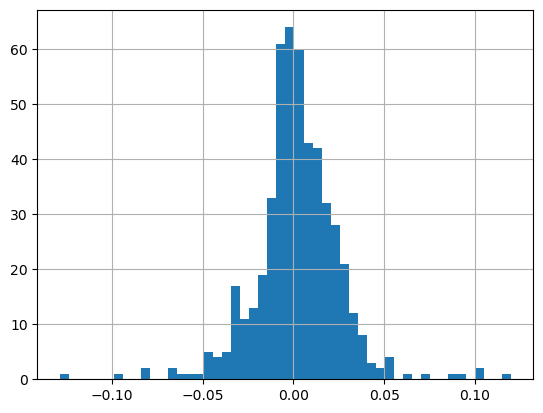

In [5]:
returns.hist(bins=50)

In [9]:
print(returns.skew())
print(returns.kurtosis())

-0.011894222257055635
5.34957517823502


In [10]:
omega_ratio(returns, 0.07)

1.2413490995803864